In [127]:
import pandas as pd

col_names = ['wikiID','freeID','movie_name','release_date','revenue','runtime','languages','countries','genres']
folder = r'C:\Users\filip\Documents\EPFL\3_sem\ADA\project\P2\MovieSummaries'
movies = pd.read_csv(folder + "\\movie.metadata.tsv",sep='\t',names=col_names)
movies.head()

,wikiID,freeID,movie_name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [128]:
from dateutil.parser import parse
parse(movies['release_date'].iloc[2])

datetime.datetime(1988, 11, 7, 0, 0)

In [129]:
release_date = pd.to_datetime(movies['release_date'],errors='coerce')
mask = release_date.isna()
second_format = pd.to_datetime(movies['release_date'][mask],format='%Y',errors='coerce')
release_date[mask] = second_format
movies['release_date'] = release_date


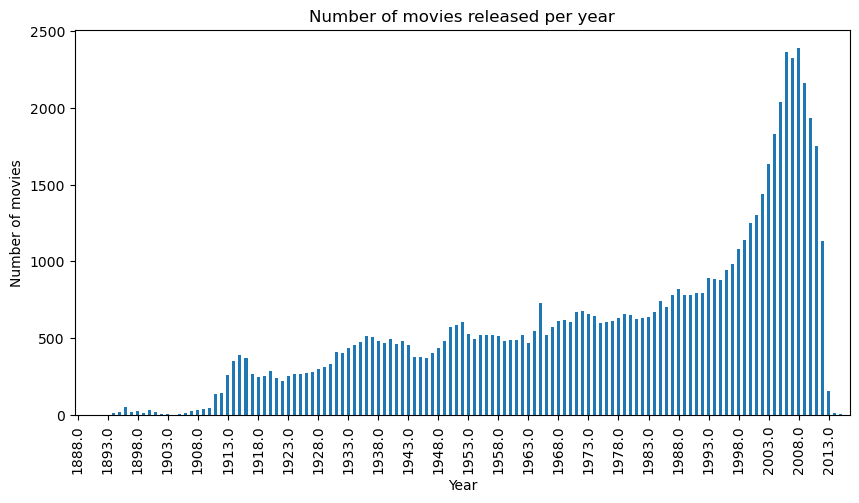

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
yearly_movies = movies.groupby(movies['release_date'].dt.year)['release_date'].count()
yearly_movies.plot(kind='bar',figsize=(10,5))
# plot 1 year every 10 years as x ticks
plt.xticks(np.arange(0, len(yearly_movies), 5))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies released per year')
plt.show()

In [131]:
yearly_movies = yearly_movies.reset_index(name='count').sort_values(['count'])

In [132]:
count_before2001 = yearly_movies[yearly_movies['release_date']<2001]['count'].sum()
count_after2001 = yearly_movies[yearly_movies['release_date']>=2001]['count'].sum()
print(f'Movies before the year 2001 are {count_before2001}')
print(f'Movies after the year 2001 are {count_after2001}')

Movies before the year 2001 are 49056
Movies after the year 2001 are 22488


In [ ]:
movies_characters['etnicity'].describe()

In [137]:
# now we wanna see the number of arab characters in the movies per year
col_names = ['wikiID','freeID','release_date','character_name','birth','gender','height','ethnicity', 'actor_name', 'age_at_release', 'freeID_character_actor_map', 'freeID_character', 'freeID_actor']
characters= pd.read_csv(open(folder + "\\character.metadata.tsv",encoding='utf-8'), delimiter="\t", names=col_names)

characters.head()

movies_characters = pd.merge(movies, characters, on=['freeID', 'wikiID'], how='inner', suffixes=('', '_y'))
movies_characters=movies_characters.drop(['release_date_y'], axis=1)
movies_characters.columns

arab_people=movies_characters[movies_characters['etnicity']== 'arab'].groupby('ethnicity')


Index(['wikiID', 'freeID', 'movie_name', 'release_date', 'revenue', 'runtime',
       'languages', 'countries', 'genres', 'character_name', 'birth', 'gender',
       'height', 'ethnicity', 'actor_name', 'age_at_release',
       'freeID_character_actor_map', 'freeID_character', 'freeID_actor'],
      dtype='object')

In [141]:
movies_characters['ethnicity'].unique()

array([nan, '/m/044038p', '/m/0x67', '/m/064b9n', '/m/07bch9',
       '/m/06v41q', '/m/033tf_', '/m/0xnvg', '/m/0d7wh', '/m/02w7gg',
       '/m/03lmx1', '/m/07mqps', '/m/0dqqwy', '/m/0ffjvd', '/m/0222qb',
       '/m/01qhm_', '/m/01336l', '/m/0dryh9k', '/m/048sp5', '/m/04mvp8',
       '/m/022fdt', '/m/0cqgdq', '/m/0268d21', '/m/041rx', '/m/04gfy7',
       '/m/07hwkr', '/m/048z7l', '/m/02ctzb', '/m/09k5jvk', '/m/0bnzjx',
       '/m/0ffkb4', '/m/075dhf0', '/m/03bx0k4', '/m/0268_k', '/m/09zyn5',
       '/m/06mvq', '/m/065b6q', '/m/038723', '/m/0150zs', '/m/09vc4s',
       '/m/04jq32s', '/m/0fqp6zk', '/m/0g0x7_', '/m/09lz9zx', '/m/046cwm',
       '/m/03bkbh', '/m/0g8_vp', '/m/092h2qt', '/m/08hpk0', '/m/0g6ff',
       '/m/0278pqj', '/m/0301y_', '/m/02sch9', '/m/019kn7', '/m/0cm7w1',
       '/m/0cnvdq1', '/m/03295l', '/m/03pqwy', '/m/0g5y6', '/m/01xhh5',
       '/m/06gbnc', '/m/0bpjh3', '/m/0fpjs3j', '/m/04nrnz', '/m/03ttfc',
       '/m/03vv99', '/m/0ffhz3', '/m/025rpb0', '/m/03w9bjf', '/m/0d

c:\Users\filip\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\filip\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\filip\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


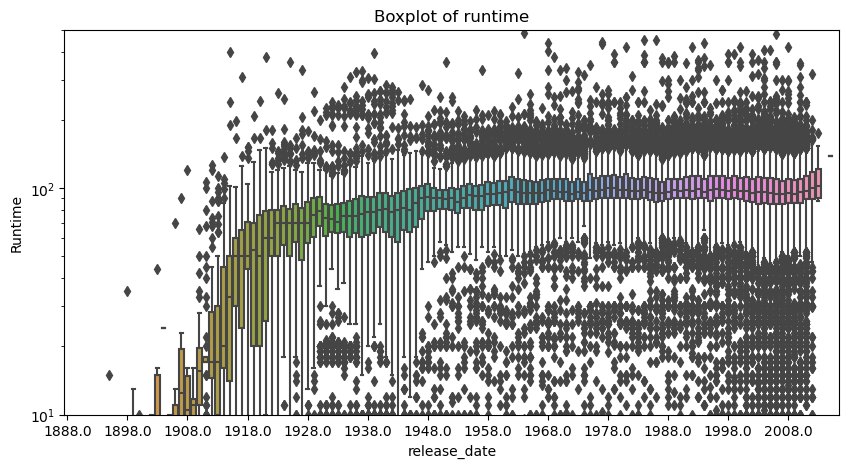

In [43]:
yearly_runtime=movies.groupby(movies['release_date'].dt.year)['runtime'].mean()

movies['runtime'].describe()
plt.figure(figsize=(10,5))
sns.boxplot(y=movies['runtime'], x=movies['release_date'].dt.year)
plt.yscale('log')
plt.ylim(10, 500)
plt.xticks(np.arange(0, len(yearly_movies), 10))
plt.ylabel('Runtime')
plt.title('Boxplot of runtime')
plt.show()



In [111]:
import pandas as pd
import json
types= pd.read_csv(folder + "\\tvtropes.clusters.txt", sep='\t', header=None, names=["type", "column_name"])


types['column_name']= types["column_name"].apply(lambda x: json.loads(x))


types_norm = pd.json_normalize(types['column_name'])


types_new= pd.concat([types, types_norm], axis=1)
types_new= types_new.drop(['column_name'], axis=1)
types_new.head()

typecast= types_new.groupby(['actor', 'type'])['movie'].count().reset_index(name='count')
typecast.head()


,actor,type,count
0,Adam Sandler,ditz,3
1,Adam Sandler,warrior_poet,1
2,Ade,stupid_crooks,1
3,Aidan Gillen,evil_prince,1
4,Al Pacino,crazy_jealous_guy,1


In [112]:
print(typecast [typecast['count'] > 1].shape[0])
typecast [typecast['count'] > 1]

24


,actor,type,count
0,Adam Sandler,ditz,3
16,Anna Faris,dumb_blonde,3
22,Ashley Tisdale,prima_donna,3
44,Bruce Willis,hitman_with_a_heart,2
75,Clint Eastwood,bounty_hunter,2
97,Danny McBride,stoner,2
145,Harrison Ford,adventurer_archaeologist,3
162,Humphrey Bogart,hardboiled_detective,4
177,James Franco,stoner,2
179,James Marsden,romantic_runnerup,2
